# **Simple linear regression**

There are two types of supervised machine learning algorithms: **Regressio**n and **classification**. The former predicts continuous value outputs while the latter predicts discrete outputs. For instance, predicting the price of a house in dollars is a regression problem whereas predicting whether a tumor is malignant or benign is a classification problem.

The term "linearity" in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two dimensional space (between two variables, in this case), we get a straight line.

A relationship between variables Y and X is represented by this equation

Y= mX + b

In this equation, Y is the dependent variable — or the variable we are trying to predict or estimate; X is the independent variable — the variable we are using to make predictions; m is the slope of the regression line — it represent the effect X has on Y. In other words, if X increases by 1 unit, Y will increase by exactly m units. 

In [23]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


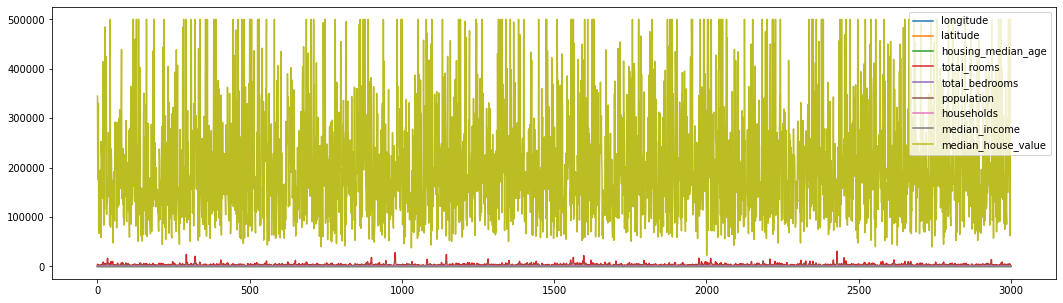

In [6]:
df.plot(figsize=(18,5))

# **No missing data**
It is nothing short of a miracle to work on a dataset with no missing values. This is why it’s imperative that we double check for null (missing) values before moving forward.

In [7]:
df.isnull().values.any()


False

The “False” output confirms that there are no null values in the dataframe.

Scikit-Learn makes it extremely easy to run models & assess its performance. We will use k-folds cross-validation (k=3) to assess the performance of our model.

In [10]:
X = pd.DataFrame(df['housing_median_age'])
y = pd.DataFrame(df['median_house_value'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

[0.010915413977936494, 0.007545450902843531, -0.0028510185969663486]


model = LinearRegression() creates a linear regression model and the for loop divides the dataset into three folds (by shuffling its indices). Inside the loop, we fit the data and then assess its performance by appending its score to a list (scikit-learn returns the R² score which is simply the coefficient of determination).

In [11]:
X = pd.DataFrame(df['median_income'])
y = pd.DataFrame(df['median_house_value'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

[0.43565223772417827, 0.4441946494752142, 0.4743726238441527]


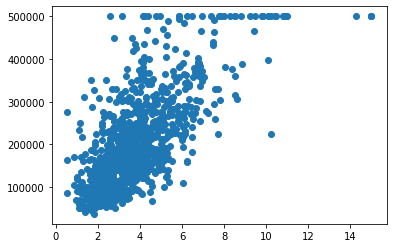

In [15]:
plt.scatter(X.iloc[test,:], y.iloc[test,:])

In [17]:
Y_pred=model.predict(X.iloc[test,:])

In [18]:
print('Coefficients: \n', model.coef_)

Coefficients: 
 [[40925.79060113]]


In [24]:
print('Mean squared error: %.2f'
      % mean_squared_error(y.iloc[test,:], Y_pred))

Mean squared error: 6351439797.99


In [26]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y.iloc[test,:], Y_pred))

Coefficient of determination: 0.47
Coefficient of determination: 0.47


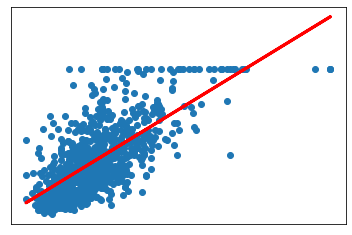

In [30]:
# Plot outputs
plt.scatter(X.iloc[test,:], y.iloc[test,:])
plt.plot(X.iloc[test,:], Y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# **Assignment 2**

Use the "diabetes.csv" to perform linear regression